In [2]:
import os
import pandas as pd
import numpy as np
import re
import pickle
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Исследование датасета

Построить графики:  
1) индекс gii по годам и регионам - кластеризация  
2) индекс gii по годам  
3) интегральные признаки по регионам  

In [3]:
#загружаю датасет из файла
with open("C://Users//dserp//ML//Degree_ML//dataset_GW.pickle", 'rb') as f:
    dataset = pickle.load(f)
f.close()
dataset

{'2013':        2013                                          Indicator  Albania  \
 8    1.1.1.  Political stability and absence of violence/te...     83.0   
 9    1.1.2.                           Government effectiveness     81.0   
 10   1.1.3.                                      Press freedom     81.0   
 12   1.2.1.                                 Regulatory quality     64.0   
 13   1.2.2.                                        Rule of law     93.0   
 14   1.2.3.                       Cost of redundancy dismissal     97.0   
 16   1.3.1.                        Ease of starting a business     23.0   
 17   1.3.2.                       Ease of resolving insolvency     59.0   
 18   1.3.3.                               Ease of paying taxes    114.0   
 21   2.1.1.                           Expenditure on education      0.0   
 22   2.1.2.          Public expenditure on education per pupil     89.0   
 25   2.1.5.                     Pupil-teacher ratio, secondary     72.0   
 27 

In [5]:
#создание корреляционных матриц для фич по годам
corr_matrix_fe = {}
for i in list(dataset.keys())[:7]:
    corr_matrix_fe['_'.join(('corr', i))] = np.abs(dataset[i].corr())# >= 0.8
corr_matrix_fe.keys()

dict_keys(['corr_2013', 'corr_2014', 'corr_2015', 'corr_2016', 'corr_2017', 'corr_2018', 'corr_2019'])

In [6]:
corr_matrix_fe['corr_2013']

,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,United Arab Emirates,United Kingdom,United States of America,Uruguay,Uzbekistan,Venezuela,VietNam,Yemen,Zambia,Zimbabwe
Albania,1.000000,0.478822,0.233855,0.098109,0.575891,0.211663,0.314407,0.450234,0.268392,0.045500,...,0.426429,0.358920,0.167054,0.278786,0.169948,0.018703,0.034841,0.019717,0.044501,0.019277
Algeria,0.478822,1.000000,0.488777,0.242650,0.447878,0.507378,0.000673,0.285441,0.049062,0.185740,...,0.111686,0.148907,0.065157,0.054540,0.335607,0.480892,0.259809,0.565929,0.178946,0.463706
Angola,0.233855,0.488777,1.000000,0.273860,0.141854,0.301983,0.015364,0.273806,0.192867,0.595679,...,0.146606,0.061523,0.131187,0.094856,0.347704,0.417155,0.361100,0.668233,0.110052,0.656049
Argentina,0.098109,0.242650,0.273860,1.000000,0.196047,0.129307,0.212568,0.014905,0.072758,0.129571,...,0.091546,0.053111,0.110600,0.563420,0.072781,0.663200,0.200379,0.275758,0.012484,0.303596
Armenia,0.575891,0.447878,0.141854,0.196047,1.000000,0.076110,0.408922,0.569952,0.043141,0.058007,...,0.093569,0.432710,0.154148,0.150488,0.061556,0.073893,0.072039,0.104113,0.046503,0.157995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.018703,0.480892,0.417155,0.663200,0.073893,0.153616,0.223753,0.121161,0.125733,0.314508,...,0.230587,0.121556,0.091851,0.229533,0.318095,1.000000,0.370797,0.595398,0.183713,0.629430
VietNam,0.034841,0.259809,0.361100,0.200379,0.072039,0.041886,0.341576,0.036091,0.242271,0.395262,...,0.535881,0.124754,0.162687,0.172412,0.615153,0.370797,1.000000,0.442377,0.090688,0.565380
Yemen,0.019717,0.565929,0.668233,0.275758,0.104113,0.255172,0.208714,0.215014,0.202353,0.517135,...,0.360223,0.052523,0.026094,0.113482,0.467106,0.595398,0.442377,1.000000,0.171392,0.684176
Zambia,0.044501,0.178946,0.110052,0.012484,0.046503,0.286328,0.150592,0.286377,0.428163,0.069473,...,0.068862,0.186047,0.411342,0.195549,0.029272,0.183713,0.090688,0.171392,1.000000,0.290283


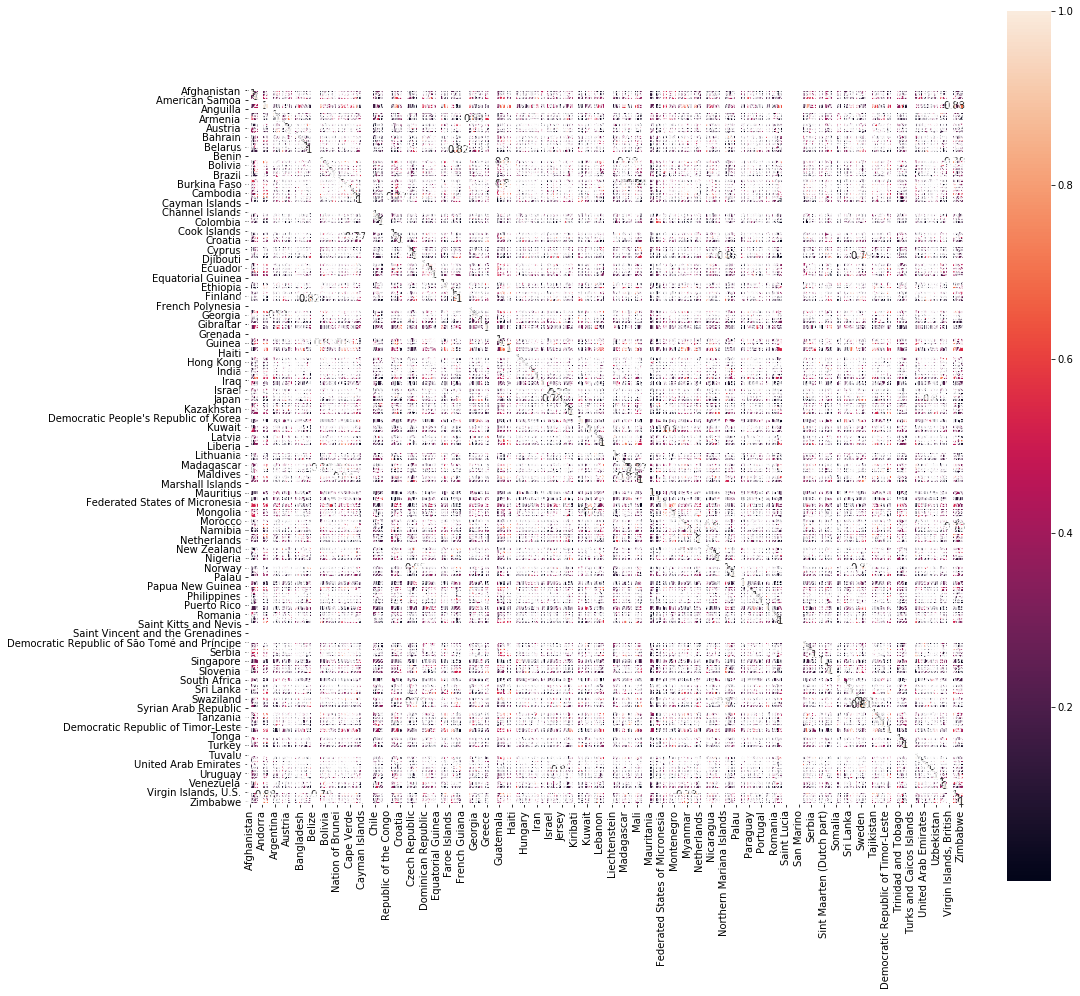

In [7]:
plt.figure(figsize=(16,16))
sn.heatmap(corr_matrix_fe['corr_2015'], square = True, annot=True)
plt.show()